In [1]:
from fastai.imports import *
path=Path('titanic')

In [8]:
df_train=pd.read_csv(f'{path}/train.csv')
df_train.head(4)
df_test=pd.read_csv((f'{path}/test.csv'))

In [9]:
def proc_df(df):
    df['Fare']=df.Fare.fillna(0)
    df.fillna(df.mode().iloc[0],inplace=True)
    df['Fare']=np.log1p(df['Fare'])
    df['Embarked']=pd.Categorical(df.Embarked)
    df['Sex']=pd.Categorical(df.Sex)
proc_df(df_train)
proc_df(df_test)

In [13]:
df_train.head(3)
df_test.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,B96 B98,S


In [73]:
cats=["Sex","Embarked"]
conts=['Age', 'SibSp', 'Parch','Fare',"Pclass"]
dep="Survived"

In [17]:
df_train.Sex.cat.codes.head(1)

0    1
dtype: int8

[Text(0.5, 1.0, 'Histogram')]

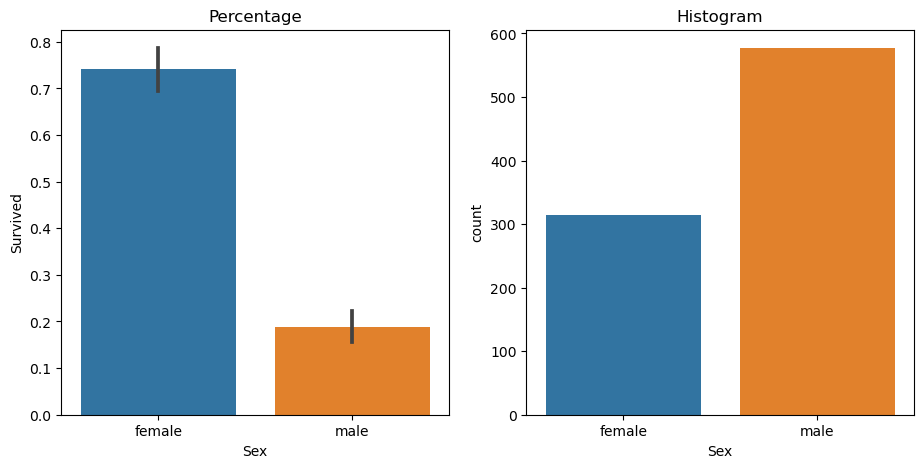

In [43]:
import seaborn as sns
plt,axs=plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df_train,x='Sex',y='Survived',ax=axs[0]).set(title='Percentage')
sns.countplot(data=df_train,x='Sex',ax=axs[1]).set(title='Histogram')

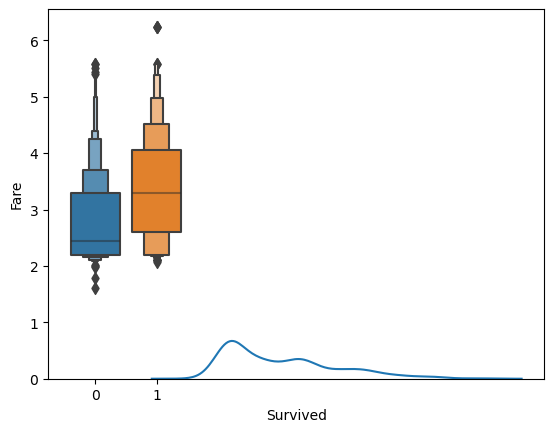

In [69]:
df_fare = df_train[df_train.Fare>0]
# fig = plt.figure(figsize=(11, 5))
# axs = fig.subplots(1, 2)

sns.boxenplot(data=df_fare, x=dep, y="Fare")
sns.kdeplot(data=df_fare, x="Fare");

In [71]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df_train, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [74]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [77]:
trn_xs.head(2)

,Sex,Embarked,Age,SibSp,Parch,Fare,Pclass
298,1,2,24.0,0,0,3.449988,1
884,1,2,25.0,0,0,2.085672,3


In [80]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
m=DecisionTreeClassifier(min_samples_leaf=50).fit(trn_xs,trn_y)

In [81]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y,m.predict(val_xs))

0.18385650224215247

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(100,min_samples_leaf=5).fit(trn_xs,trn_y)
mean_absolute_error(val_y,rf.predict(val_xs))

0.19282511210762332